## Layer1

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import csv
import nltk
from matplotlib import pyplot as plt
import os
import re
import warnings
import random
warnings.filterwarnings('ignore')
from collections import Counter,defaultdict
from nltk import word_tokenize
from math import log
import string
import pickle
from math import log
import gensim
from gensim import corpora
from gensim import models
from string import digits
from collections import defaultdict
import ast
cwd = os.getcwd()

In [2]:
osname = os.name
if osname =='Windows':
    sym = "//"
else:
    sym = "/"

In [5]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
index_node=[i for i in range(15)]
g=nx.Graph()
g.add_nodes_from(index_node)
edge_lt=[(1,3,0.89),(1,14,0.79),(2,7,0.68),(2,8,0.73),(2,4,0.95),(3,14,0.71),(4,11,0.21),(4,14,0.25),(5,7,0.59),(5,8,0.89),(6,9,0.61),(6,11,0.90),(6,13,0.53),(9,11,0.87),(9,13,0.64),(10,12,0.71),(10,15,0.93),(12,15,0.35),(14,15,0.27)]
g.add_weighted_edges_from(edge_lt)
g=g.to_undirected()

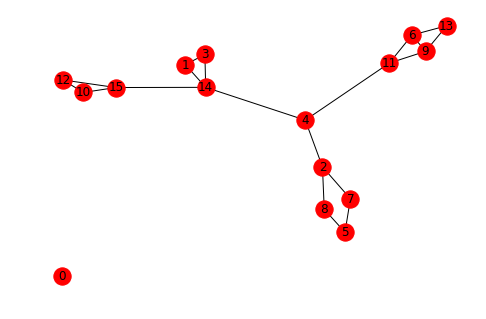

In [6]:
pos = nx.spring_layout(g)
nx.draw(g, pos = pos, with_labels=True)
#nx.draw_networkx_edge_labels(g, pos)
plt.show()

[0, 1, 2, 1, 2, 2, 3, 2, 2, 3, 4, 3, 4, 3, 1, 4]


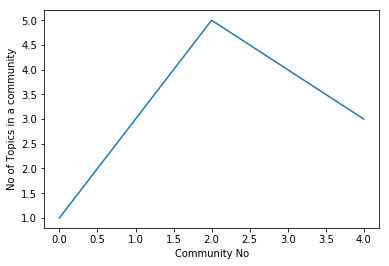

In [7]:
parts=community_louvain.best_partition(g)
values=[parts.get(node) for node in g.nodes()]
topic_comm=values
print(values)
from collections import Counter
c=Counter(parts.values())
plt.plot(c.keys(),c.values())
plt.xlabel('Community No')
plt.ylabel('No of Topics in a community')
plt.show()

## Layer 2

In [16]:
from igraph import * 
g=Graph(directed=True)
g.add_vertices(14)
edge_lt=[(1,5),(1,2),(1,9),(2,3),(3,5),(3,11),(4,6),(4,9),(5,8),(6,1),(6,9),(6,2),(8,7),(8,12),(9,10),(9,11),(10,12),(10,5),(11,12),(11,10),(12,13),(13,)]
g.add_edges(edge_lt)

In [19]:
bc=g.bibcoupling()
cocit=g.cocitation()
g.to_undirected()
dist=g.shortest_paths_dijkstra()

In [21]:
n=len(bc)
bc_node=[sum(bc[i]) for i in range(n)]
cocit_node=[sum(cocit[i]) for i in range(n)]

In [28]:
bc_node[1:]

[5, 0, 3, 2, 0, 3, 0, 2, 2, 4, 3, 0, 0]

In [29]:
cocit_node[1:]

[2, 4, 0, 0, 4, 1, 1, 0, 5, 2, 2, 3, 0]

In [25]:
poi=[4,10,7]
scr=[0]
for i in range(1,14):
    score=(bc_node[i]+cocit_node[i])
    den=float('inf')
    for val in poi:
        den=min(den,dist[val][i])
    if den==0:
        scr.append(0)
    else:
        scr.append(score/den)

In [27]:
scr[1:]

[3.5, 2.0, 1.5, 0, 4.0, 4.0, 0, 2.0, 7.0, 0, 5.0, 3.0, 0.0]

In [35]:
sum(scr[1:])/(len(scr[1:])-3)

3.2